In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/campaign_responses.csv')

In [3]:
df.head(5)

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [5]:
# Separate numerical and categorical columns
numerical_data = df.select_dtypes(include=['number'])
categorical_data = df.select_dtypes(exclude=['number'])

print("Numerical Data:\n", numerical_data)
print("\nCategorical Data:\n", categorical_data)

Numerical Data:
     customer_id  age  annual_income  credit_score  no_of_children
0             1   35          65000           720               2
1             2   28          45000           680               0
2             3   42          85000           750               3
3             4   31          55000           710               1
4             5   47          95000           790               2
5             6   25          38000           630               0
6             7   39          72000           740               2
7             8   33          48000           670               0
8             9   51         110000           820               3
9            10   27          40000           620               0
10           11   44          90000           780               2
11           12   30          52000           690               0
12           13   36          75000           730               1
13           14   29          45000           660          

In [8]:
for col in numerical_data.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n", outliers)

Outliers in customer_id:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded]
Index: []
Outliers in age:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded]
Index: []
Outliers in annual_income:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded]
Index: []
Outliers in credit_score:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded]
Index: []
Outliers in no_of_children:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded]
Index: []


In [9]:
from scipy.stats import zscore

# Calculate Z-scores for each numerical column
for col in df.select_dtypes(include=['number']).columns:
    df['z_score'] = zscore(df[col])
    outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
    print(f"Outliers in {col}:\n", outliers)

Outliers in customer_id:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded, z_score]
Index: []
Outliers in age:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded, z_score]
Index: []
Outliers in annual_income:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded, z_score]
Index: []
Outliers in credit_score:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded, z_score]
Index: []
Outliers in no_of_children:
 Empty DataFrame
Columns: [customer_id, age, gender, annual_income, credit_score, employed, marital_status, no_of_children, responded, z_score]
Index: []


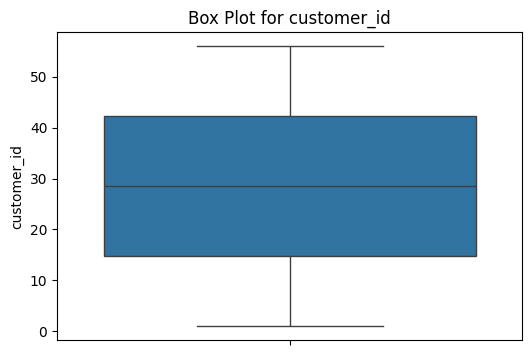

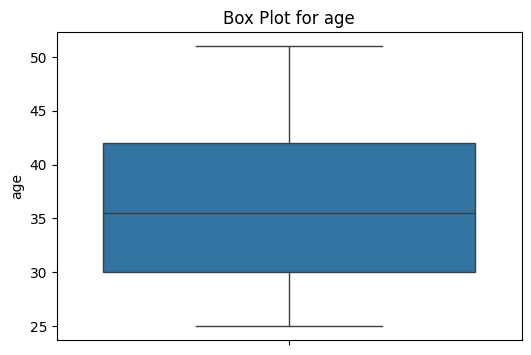

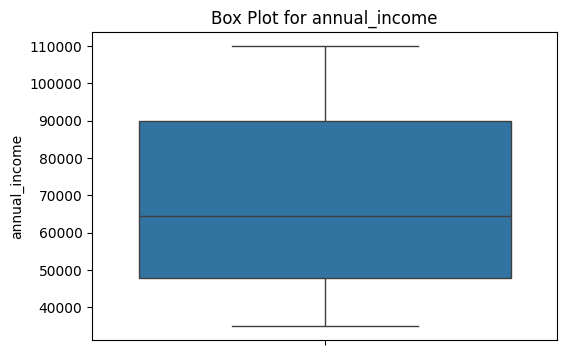

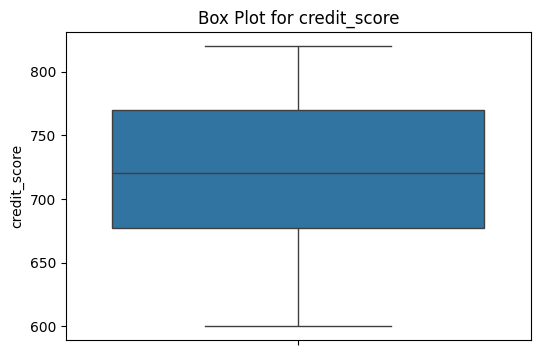

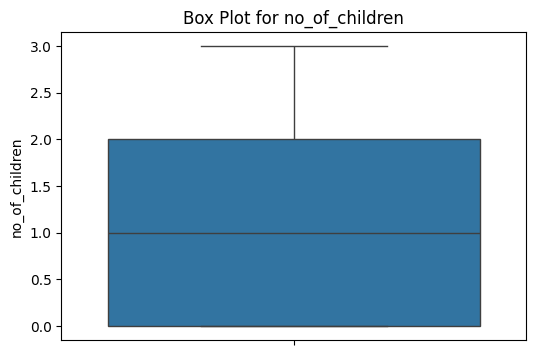

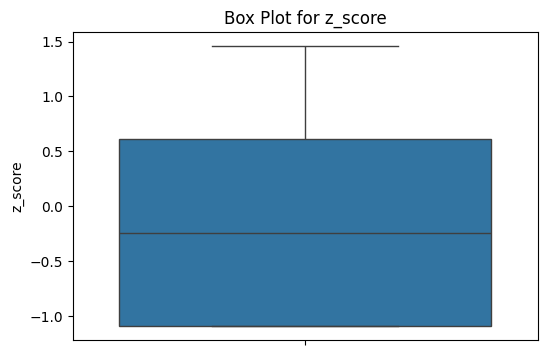

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for each numerical column
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()


Univariate Analysis

count    56.000000
mean     28.500000
std      16.309506
min       1.000000
25%      14.750000
50%      28.500000
75%      42.250000
max      56.000000
Name: customer_id, dtype: float64


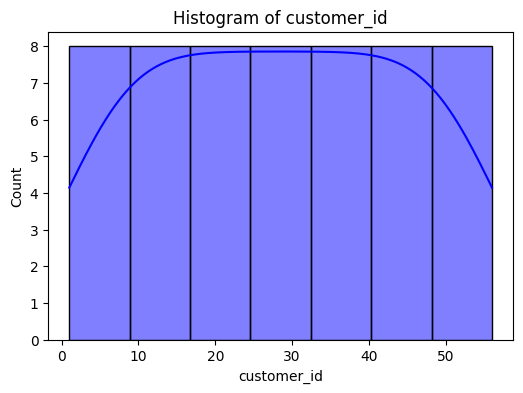

count    56.000000
mean     36.214286
std       7.088311
min      25.000000
25%      30.000000
50%      35.500000
75%      42.000000
max      51.000000
Name: age, dtype: float64


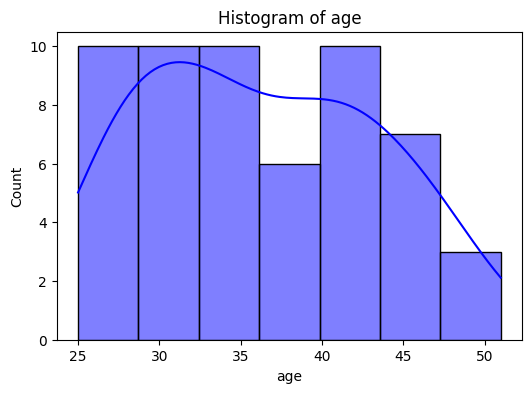

count        56.000000
mean      69017.857143
std       22784.756524
min       35000.000000
25%       48000.000000
50%       64500.000000
75%       90000.000000
max      110000.000000
Name: annual_income, dtype: float64


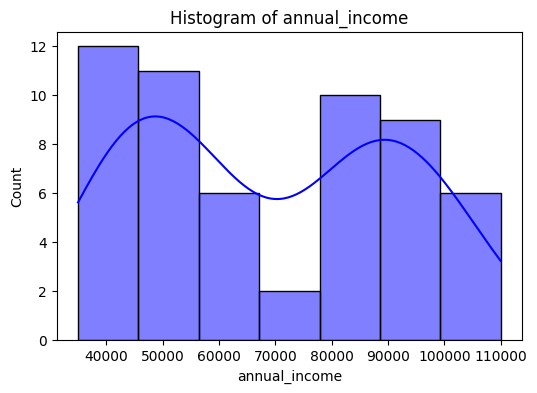

count     56.000000
mean     719.107143
std       60.340753
min      600.000000
25%      677.500000
50%      720.000000
75%      770.000000
max      820.000000
Name: credit_score, dtype: float64


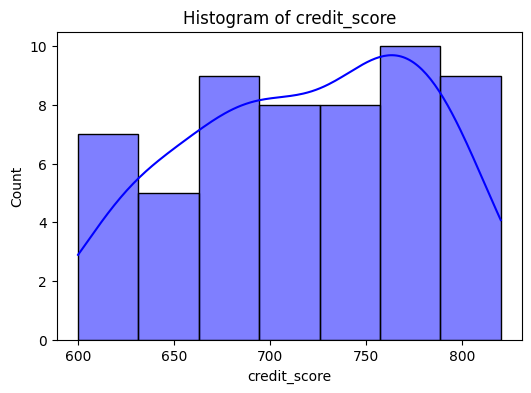

count    56.000000
mean      1.285714
std       1.186504
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: no_of_children, dtype: float64


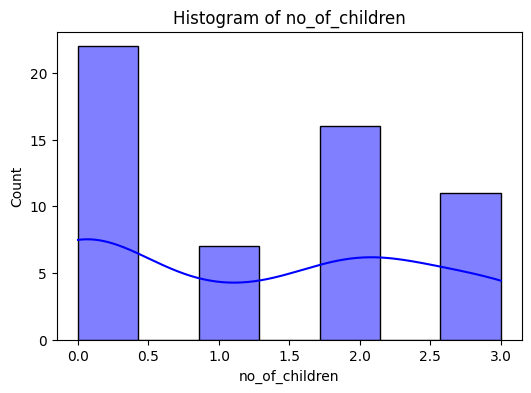

In [11]:
for col in numerical_data:

    # Descriptive statistics
    print(df[col].describe())

    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.show()

Univariate Analysis for gender:
gender
Female    28
Male      28
Name: count, dtype: int64


<ipython-input-12-f0b222afb052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


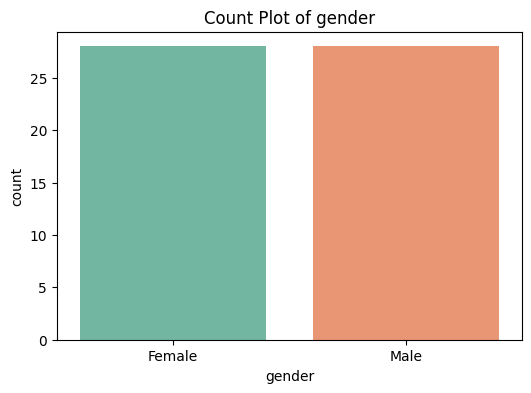

Univariate Analysis for employed:
employed
Yes    43
No     13
Name: count, dtype: int64


<ipython-input-12-f0b222afb052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


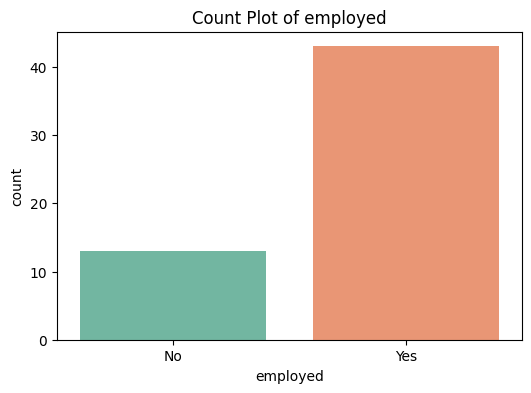

Univariate Analysis for marital_status:
marital_status
Married    28
Single     28
Name: count, dtype: int64


<ipython-input-12-f0b222afb052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


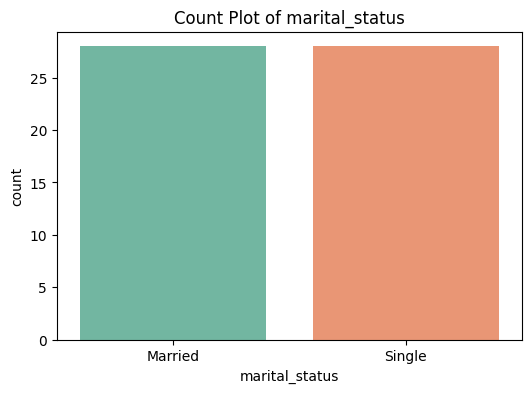

Univariate Analysis for responded:
responded
No     28
Yes    28
Name: count, dtype: int64


<ipython-input-12-f0b222afb052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


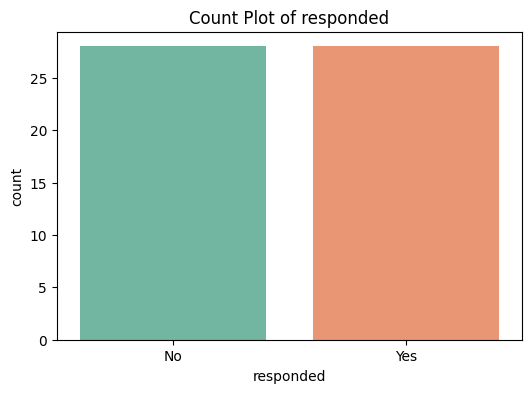

In [12]:
for col in categorical_data:
    print(f"Univariate Analysis for {col}:")

    # Frequency distribution
    print(df[col].value_counts())

    # Count plot
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.show()

Bivariate Analysis

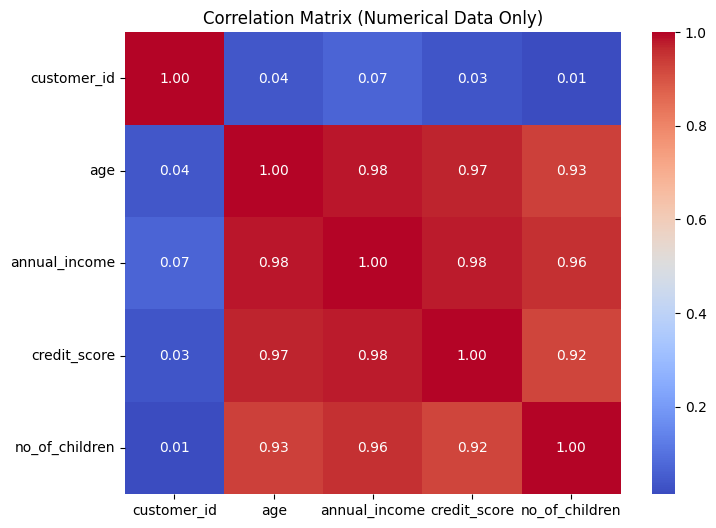

                customer_id       age  annual_income  credit_score  \
customer_id        1.000000  0.038532       0.070627      0.034086   
age                0.038532  1.000000       0.983787      0.970942   
annual_income      0.070627  0.983787       1.000000      0.978764   
credit_score       0.034086  0.970942       0.978764      1.000000   
no_of_children     0.013154  0.932992       0.955499      0.922946   

                no_of_children  
customer_id           0.013154  
age                   0.932992  
annual_income         0.955499  
credit_score          0.922946  
no_of_children        1.000000  


In [13]:
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Data Only)')
plt.show()

# Optionally, print the correlation matrix
print(correlation_matrix)

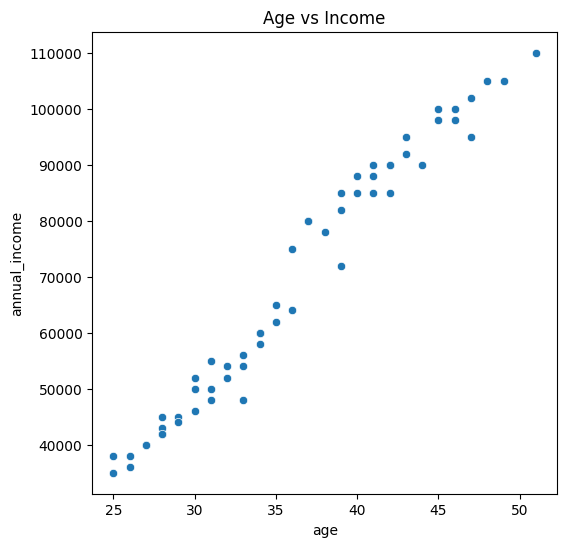

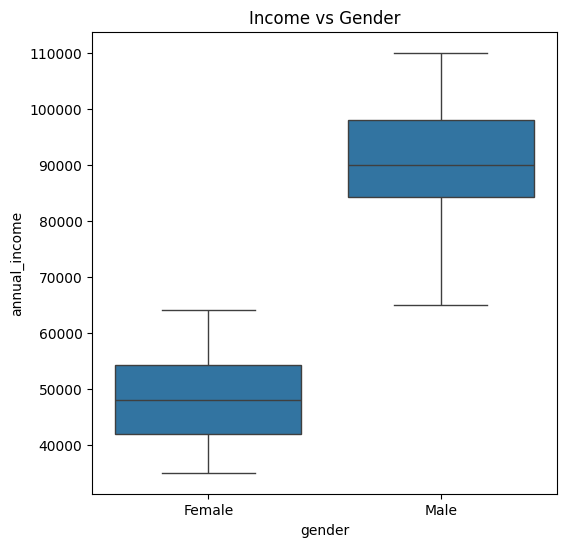

In [15]:
# Scatter plot for relationship between 'age' and 'income'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='age', y='annual_income', data=df)
plt.title('Age vs Income')
plt.show()

# Box plot to analyze 'income' by 'gender'
plt.figure(figsize=(6, 6))
sns.boxplot(x='gender', y='annual_income', data=df)
plt.title('Income vs Gender')
plt.show()

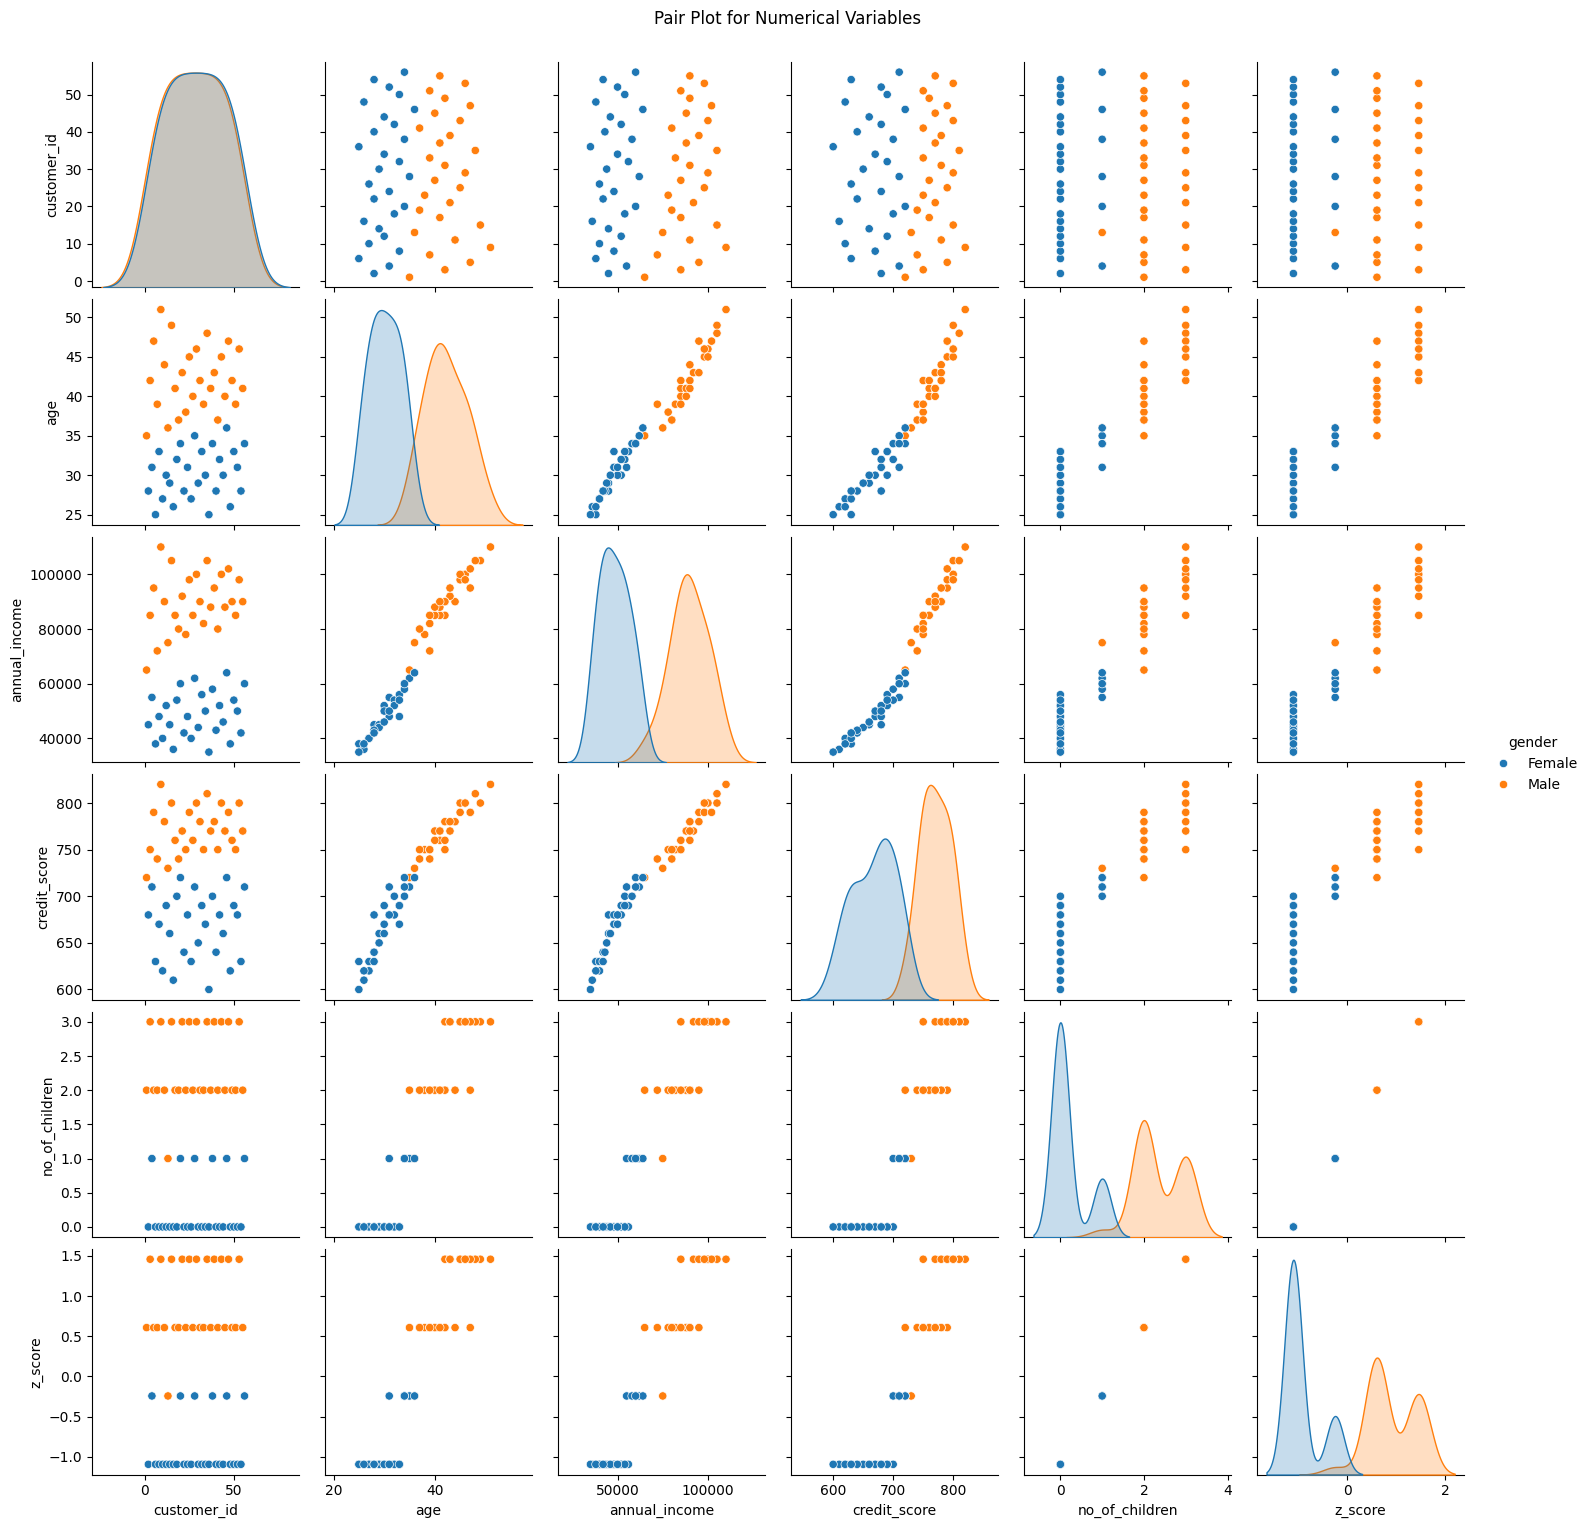

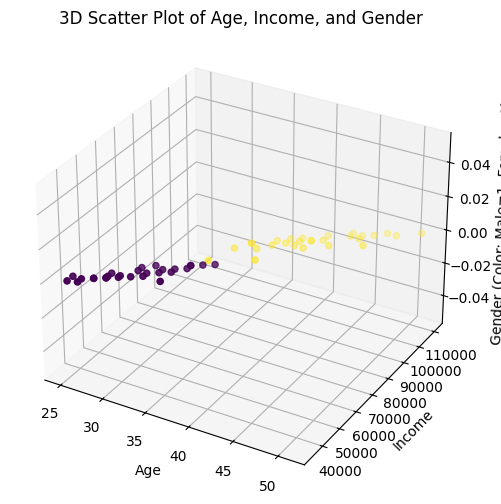

<ipython-input-18-c87fda9ed2a8>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['age', 'gender'])['annual_income'].mean().unstack()


gender        Female           Male
age                                
25      36500.000000            NaN
26      37000.000000            NaN
27      40000.000000            NaN
28      43000.000000            NaN
29      44500.000000            NaN
30      49333.333333            NaN
31      51000.000000            NaN
32      53000.000000            NaN
33      52666.666667            NaN
34      59333.333333            NaN
35      62000.000000   65000.000000
36      64000.000000   75000.000000
37               NaN   80000.000000
38               NaN   78000.000000
39               NaN   79666.666667
40               NaN   86500.000000
41               NaN   87666.666667
42               NaN   88333.333333
43               NaN   93500.000000
44               NaN   90000.000000
45               NaN   99000.000000
46               NaN   99000.000000
47               NaN   98500.000000
48               NaN  105000.000000
49               NaN  105000.000000
51               NaN  110000

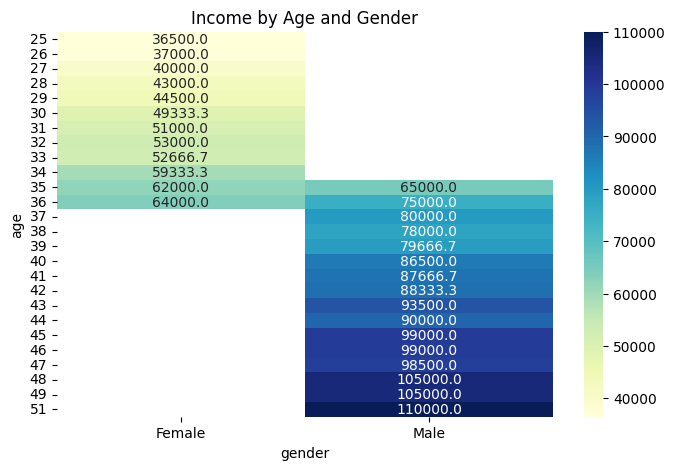

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Pairplot for all numerical features
sns.pairplot(df, hue='gender')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

# 3D Scatter plot for 'age', 'income', and 'gender'
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['annual_income'], c=(df['gender'] == 'Male').astype(int), cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Gender (Color: Male=1, Female=0)')
plt.title('3D Scatter Plot of Age, Income, and Gender')
plt.show()

# Group analysis for income by age and gender
grouped_data = df.groupby(['age', 'gender'])['annual_income'].mean().unstack()
print(grouped_data)

# Heatmap for income by age and gender
plt.figure(figsize=(8, 5))
sns.heatmap(grouped_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Income by Age and Gender')
plt.show()
